# Домашнее задание

## по дисциплине «Методы машинного обучения»

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

В качестве набора данных используется датасет, содержащий данные о 1000 фотокамерах на основе 13 свойств. 

Выбранный набор данных состоит из одного файла camera_dataset.csv, содержащего все данные датасета. Данный файл содержит следующие колонки(13 свойств каждой камеры):
* Model - модель
* Release date - дата выпуска
* Max resolution - максимальное разрешение
* Low resolution - низкое разрешение
* Effective pixels - эффективные пиксели (пиксели, которые захватывают данные изображения)
* Zoom wide (W) - широкий фокусный диапазон
* Zoom tele (T) - телефото зум
* Normal focus range - нормальный диапазон фокусировки
* Macro focus range - макро диапазон фокусировки
* Storage included - объем хранилища
* Weight (inc. batteries) - вес (включая батареи)
* Dimensions - габаритные размеры
* Price - цена

Original dataset: https://www.kaggle.com/crawford/1000-cameras-dataset/

In [1]:
!pip install gmdhpy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from gmdhpy import gmdh
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Обучающая выборка
data = pd.read_csv('camera_dataset.csv', sep=",")
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [4]:
data.shape 

(1038, 13)

In [5]:
data.dtypes 

Model                       object
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object

In [6]:
data.isnull().sum() 

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [0]:
data = data.fillna(0)

In [8]:
data.isnull().sum() 

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64

Вывод. Представленный набор данных не содержит пропусков ни в обучающей, ни в тестовой выборках.
Построим некоторые графики для понимания структуры данных.

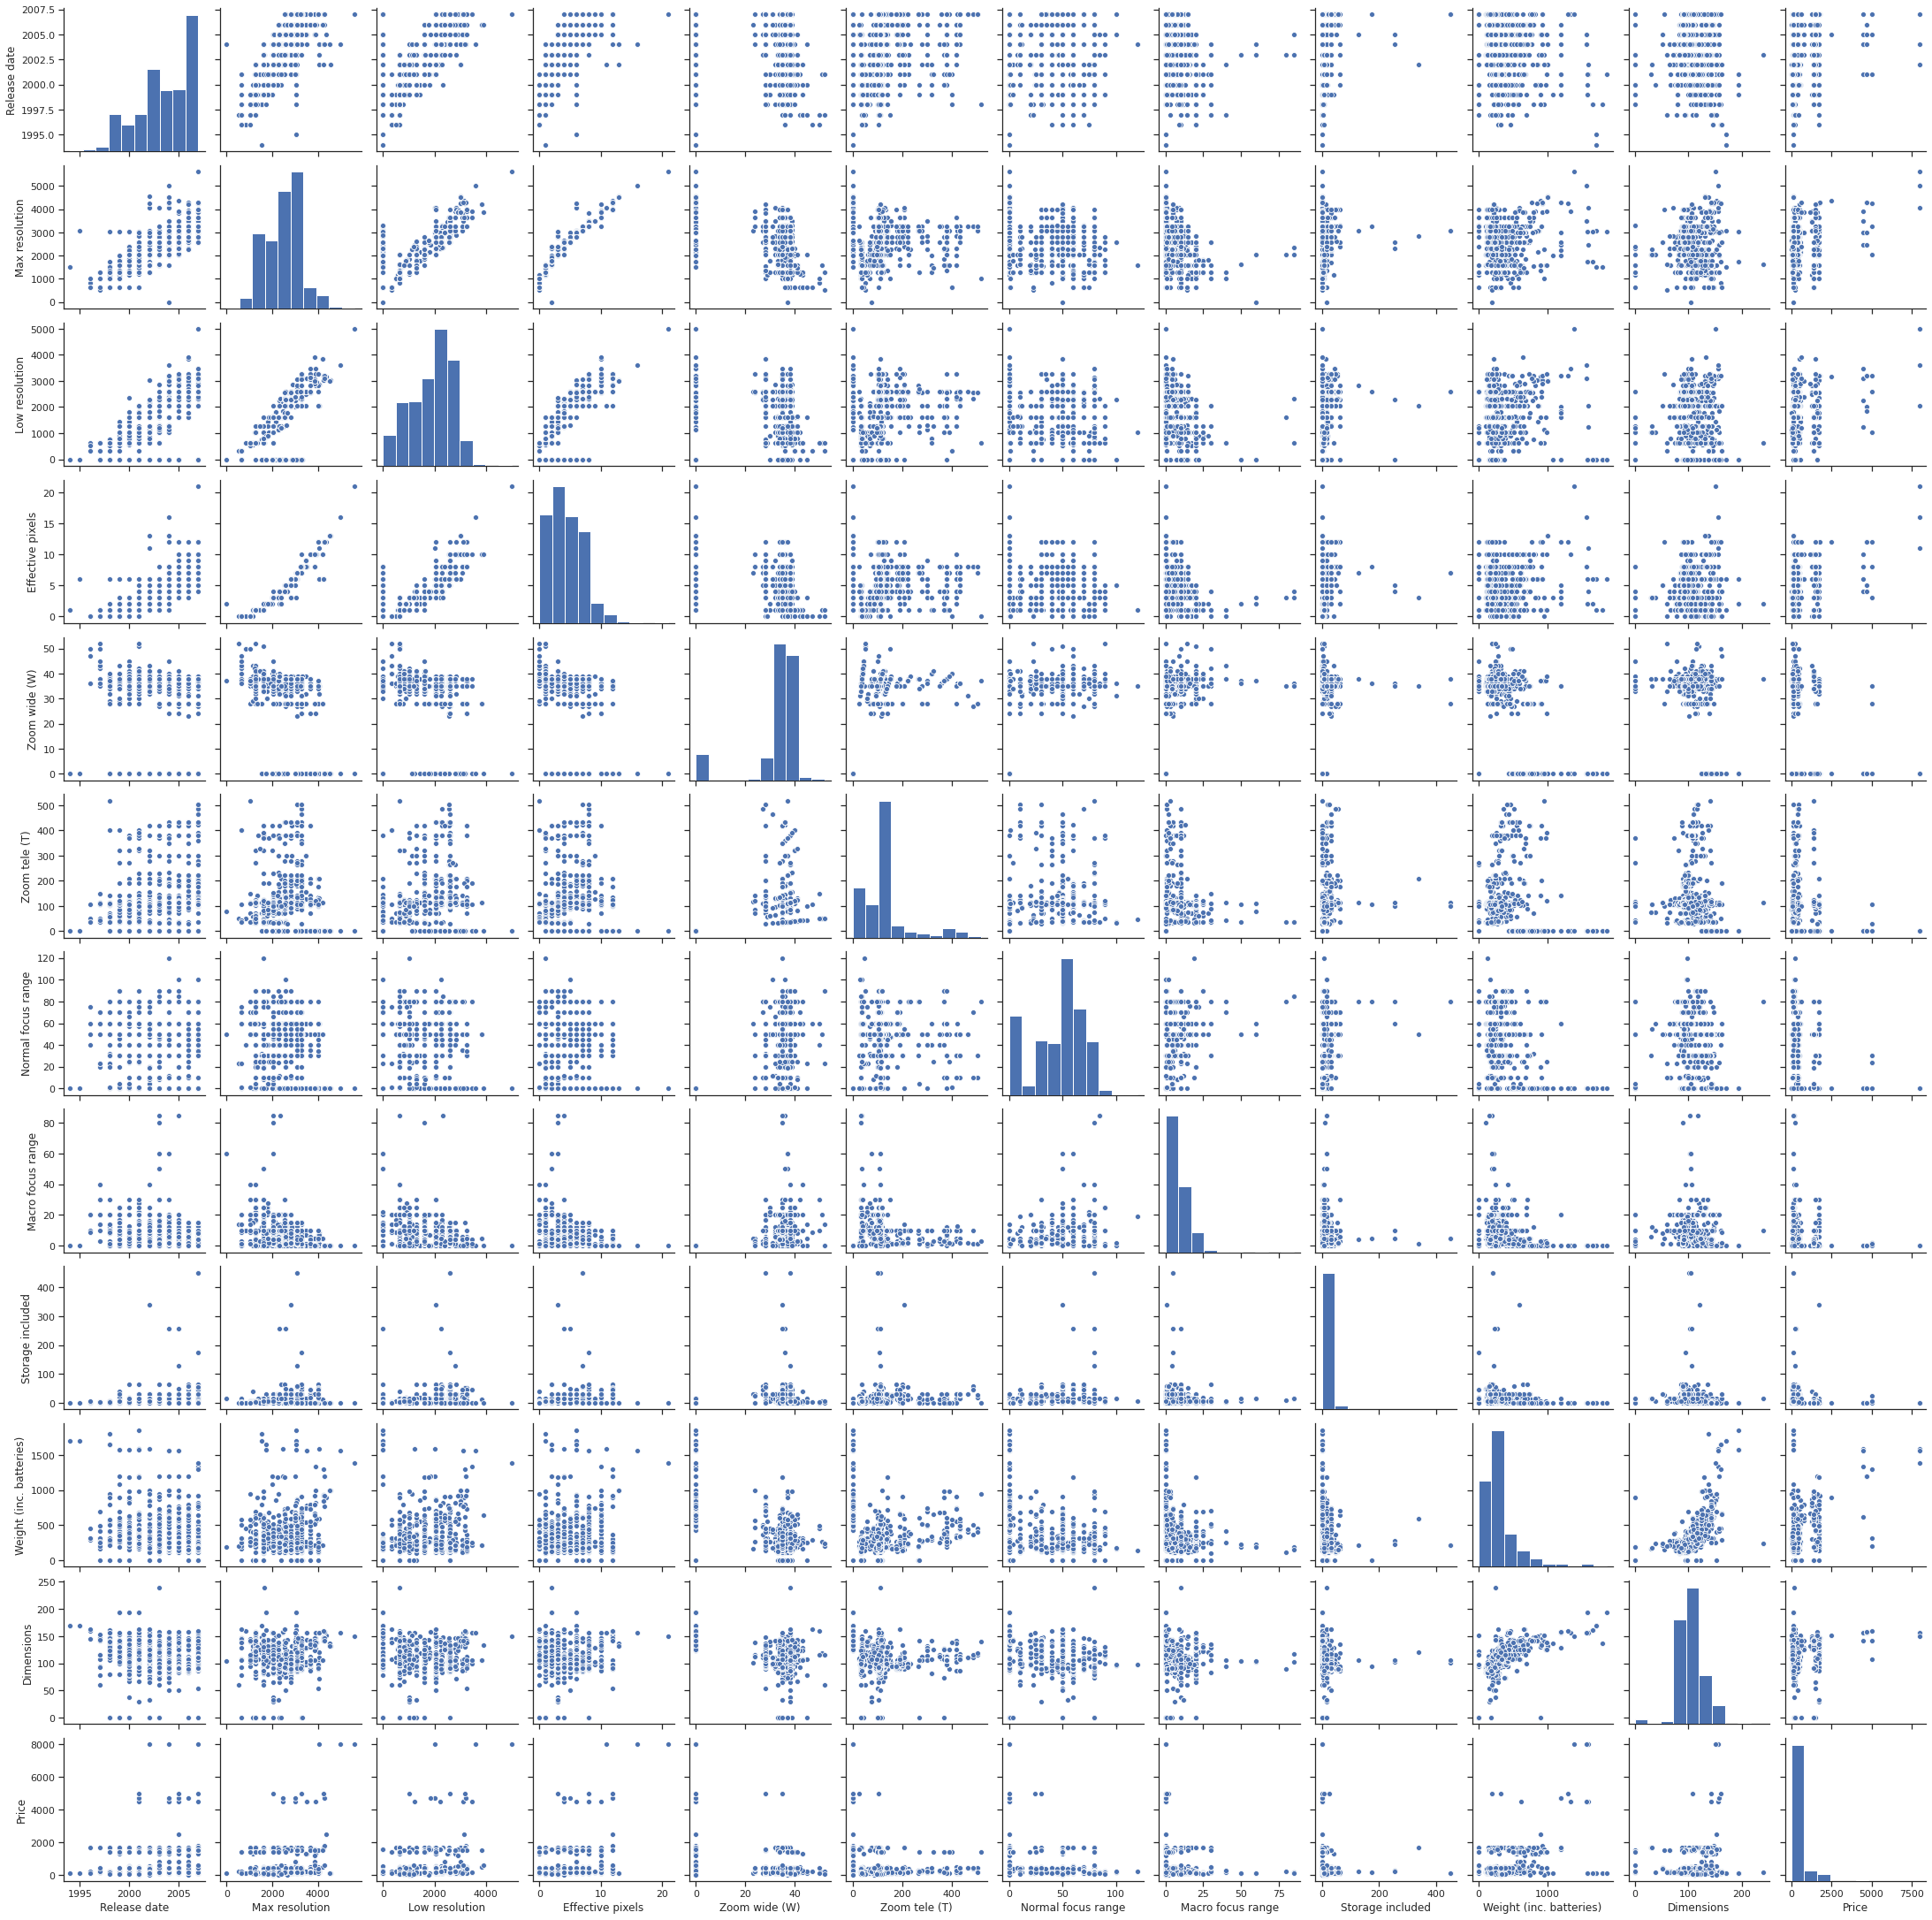

In [9]:
# Парные диаграммы
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

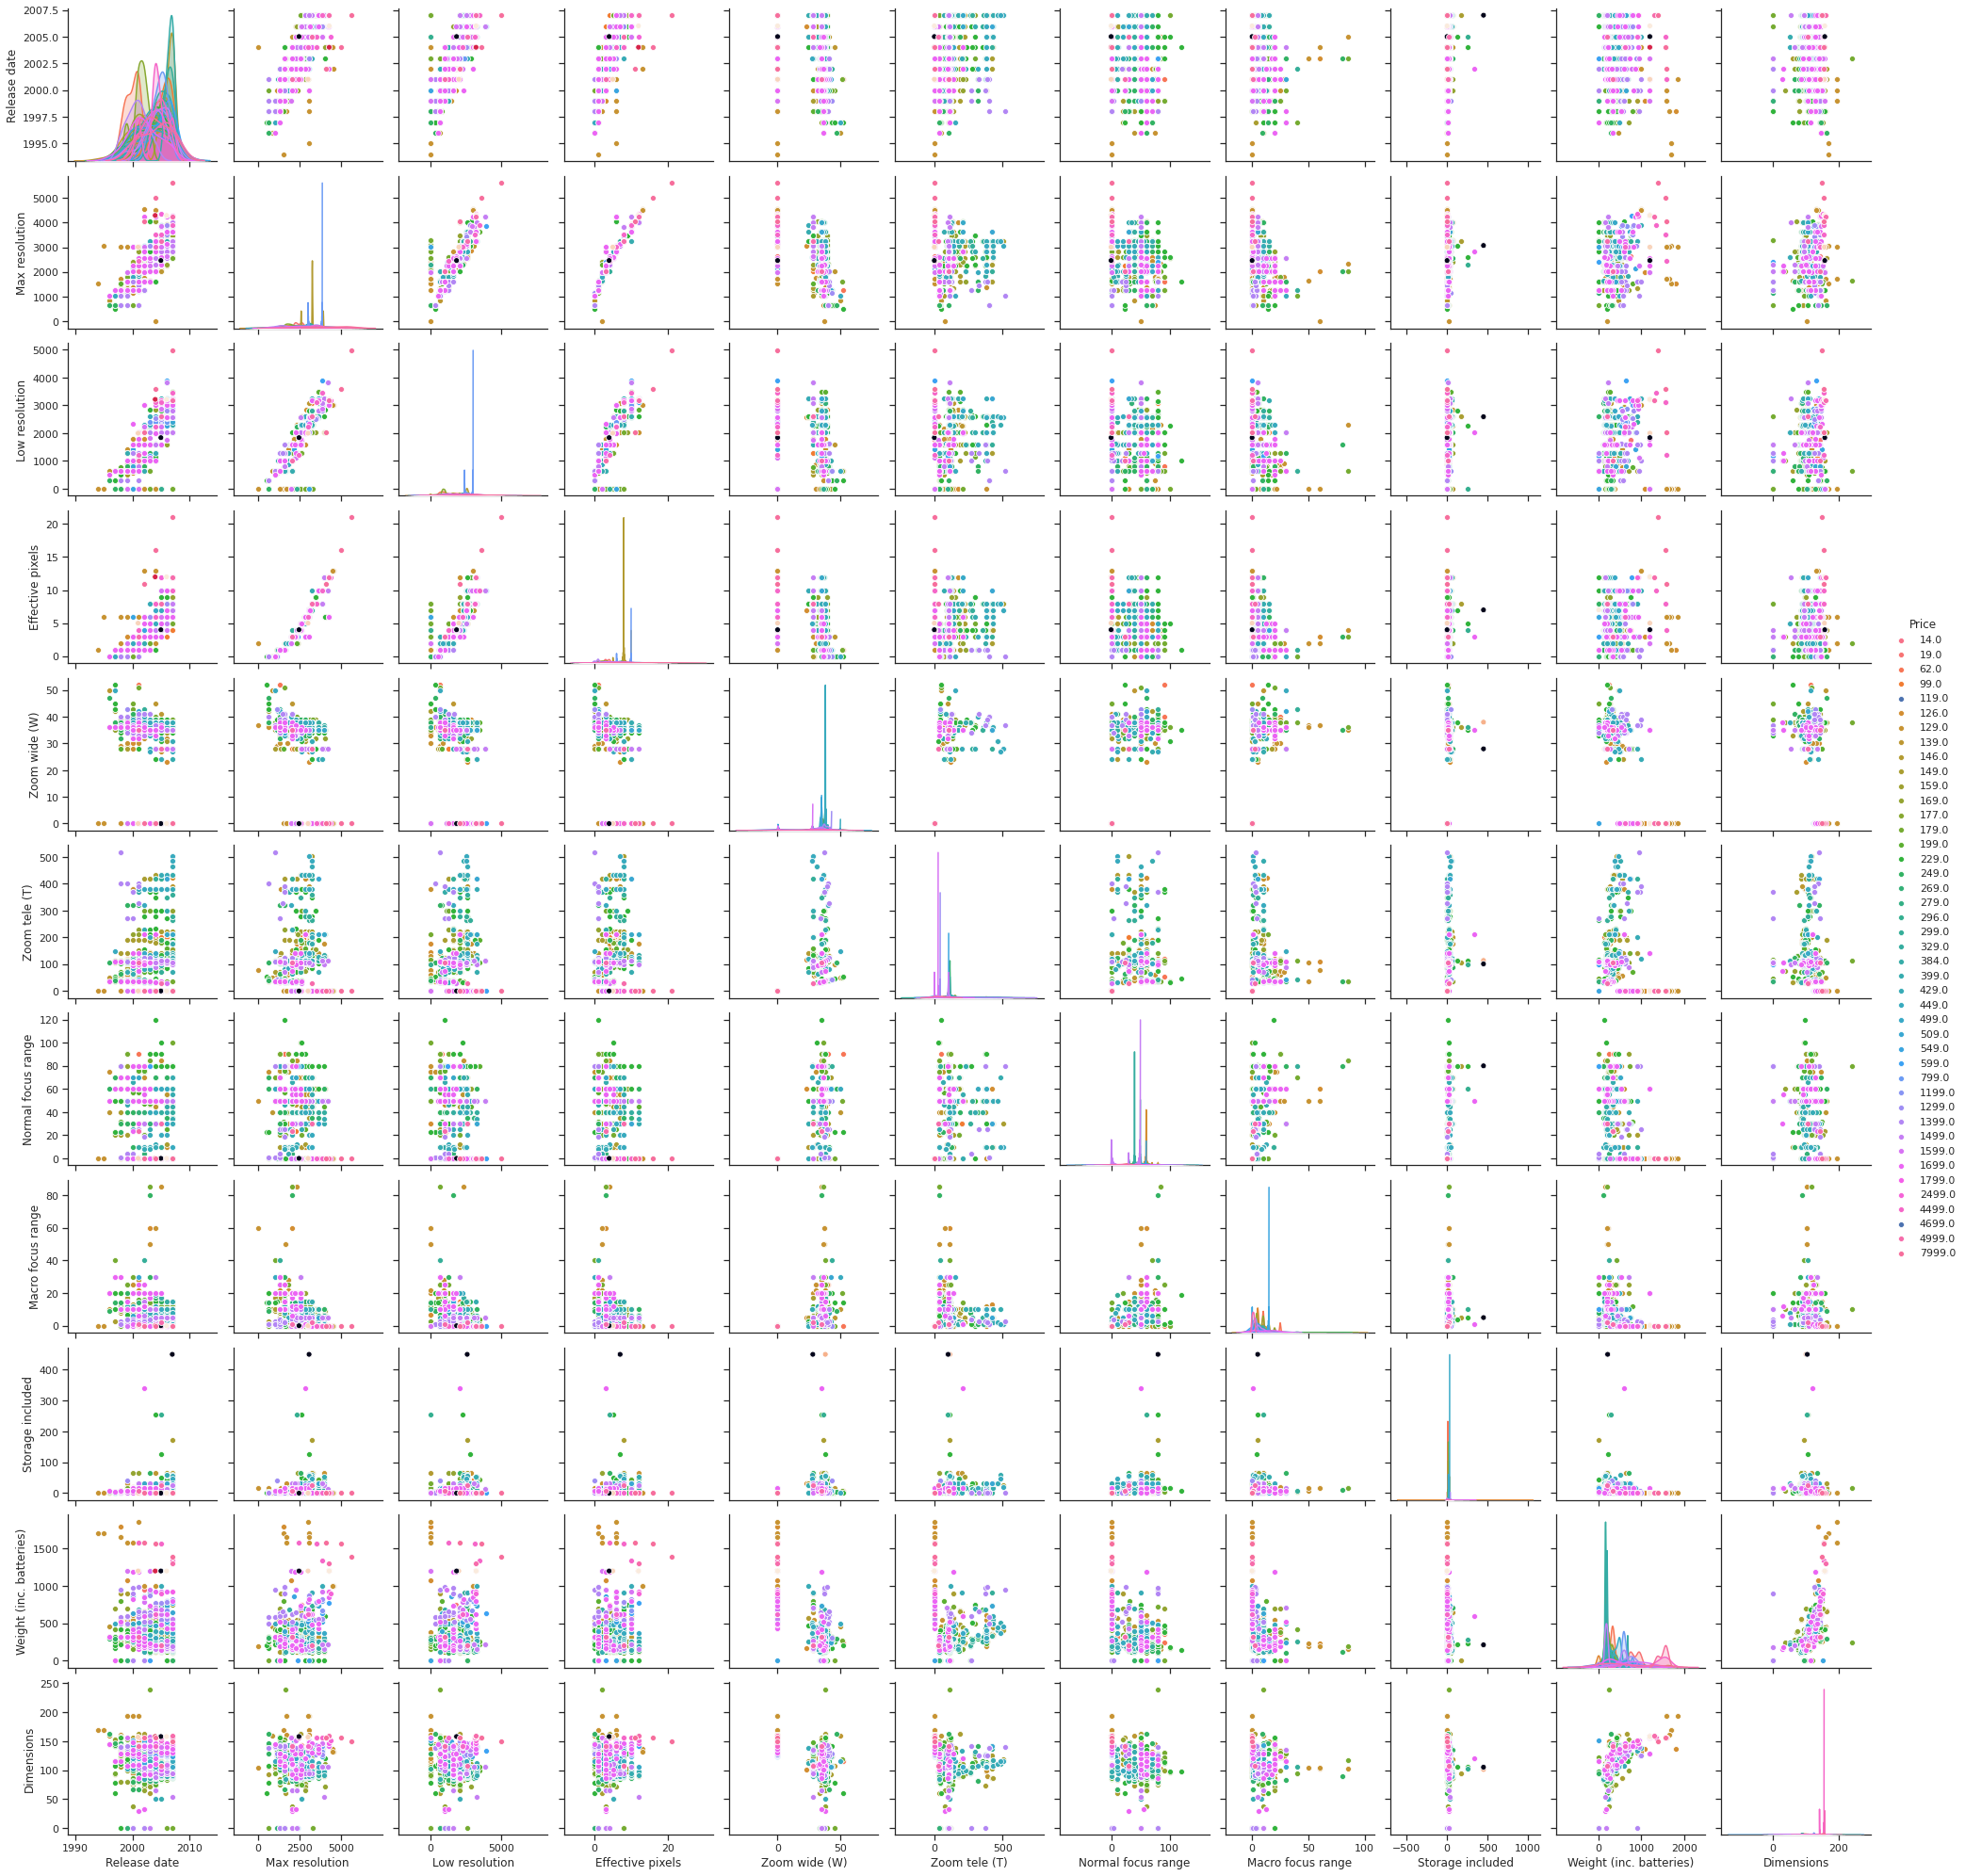

In [10]:
sns.pairplot(data, hue="Price")

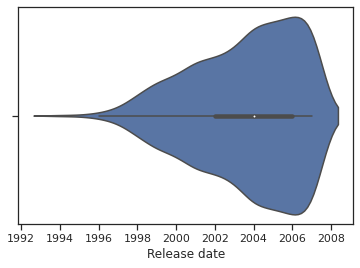

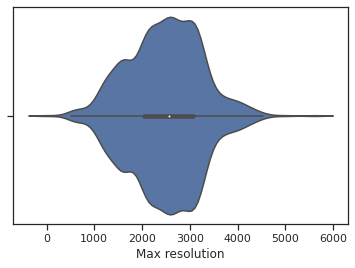

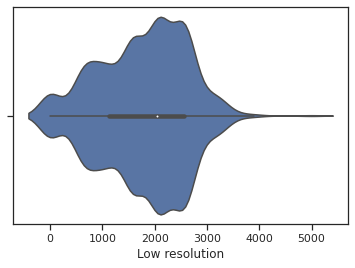

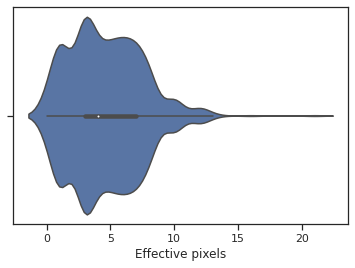

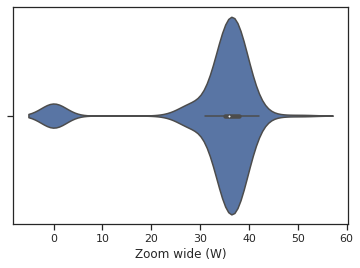

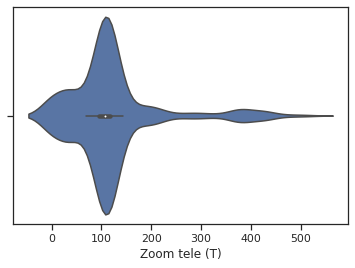

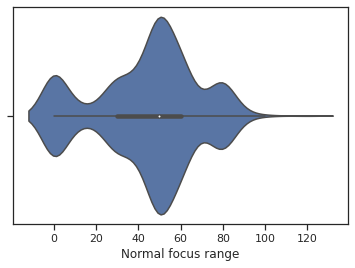

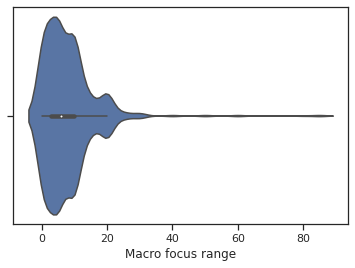

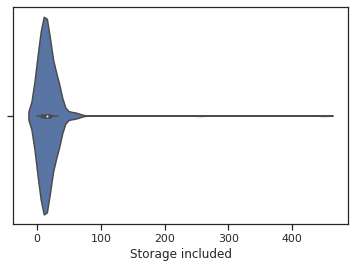

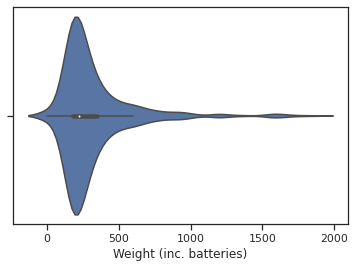

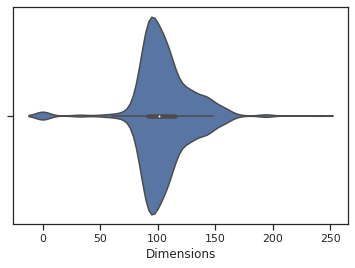

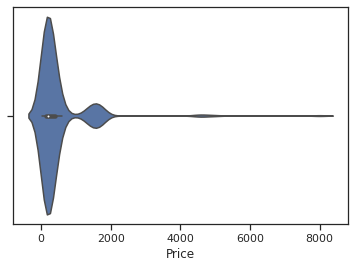

In [11]:
# Скрипичные диаграммы для числовых колонок
for col in data.columns[1:]:
    sns.violinplot(x=data[col])
    plt.show()

3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [12]:
data.dtypes

Model                       object
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

# кодирование категориальных признаков числовыми
le = LabelEncoder()
data['Model'] = le.fit_transform(data['Model'])

In [14]:
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [0]:
scale_cols = data.columns
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [0]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [17]:
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Model_scaled,Release date_scaled,Max resolution_scaled,Low resolution_scaled,Effective pixels_scaled,Zoom wide (W)_scaled,Zoom tele (T)_scaled,Normal focus range_scaled,Macro focus range_scaled,Storage included_scaled,Weight (inc. batteries)_scaled,Dimensions_scaled,Price_scaled
0,0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,0.000000,0.230769,0.182336,0.128205,0.000000,0.730769,0.220077,0.583333,0.470588,0.008889,0.225806,0.395833,0.020664
1,1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,0.000964,0.307692,0.227920,0.128205,0.047619,0.730769,0.220077,0.416667,0.000000,0.008889,0.225806,0.658333,0.020664
2,2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,0.001929,0.461538,0.113960,0.000000,0.000000,0.865385,0.086873,0.000000,0.000000,0.004444,0.000000,0.000000,0.020664
3,3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,0.002893,0.384615,0.205128,0.128205,0.000000,0.673077,0.067568,0.000000,0.000000,0.008889,0.000000,0.000000,0.031935
4,4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,0.003857,0.384615,0.205128,0.128205,0.000000,0.826923,0.083012,0.416667,0.000000,0.088889,0.161290,0.533333,0.160927


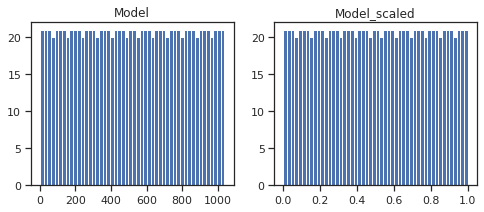

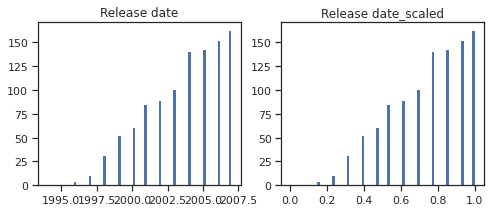

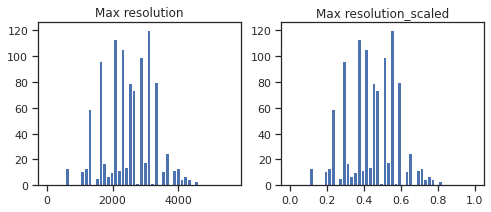

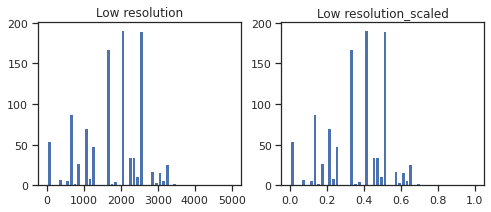

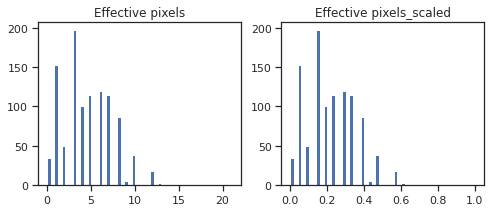

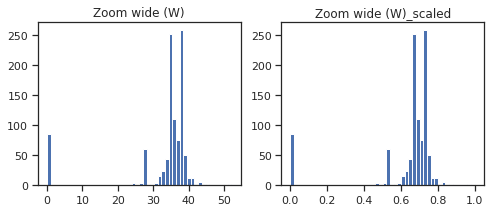

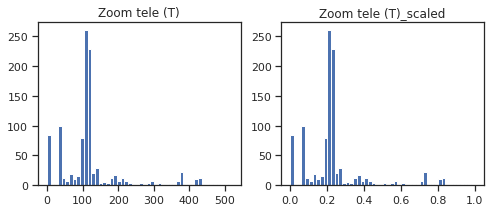

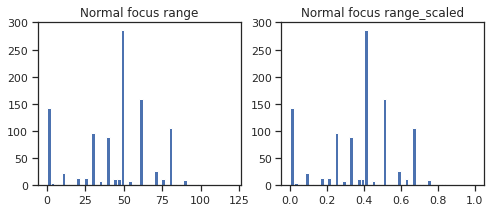

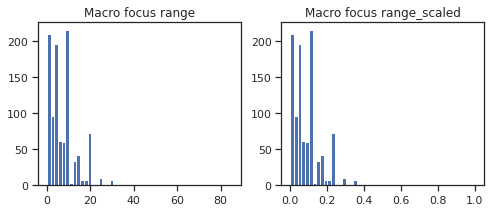

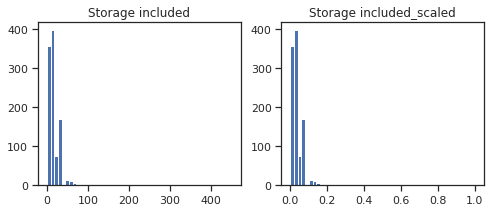

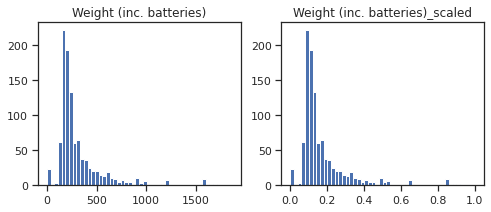

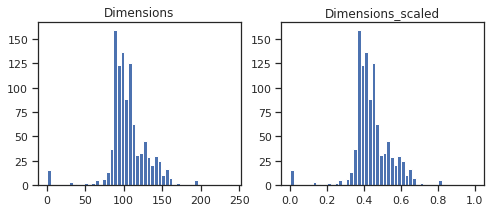

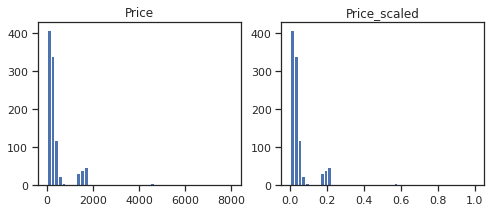

In [18]:

# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [19]:
corr_cols_1 = scale_cols
corr_cols_2 = [x+'_scaled' for x in scale_cols]

print(corr_cols_1)
print(corr_cols_2)

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')
['Model_scaled', 'Release date_scaled', 'Max resolution_scaled', 'Low resolution_scaled', 'Effective pixels_scaled', 'Zoom wide (W)_scaled', 'Zoom tele (T)_scaled', 'Normal focus range_scaled', 'Macro focus range_scaled', 'Storage included_scaled', 'Weight (inc. batteries)_scaled', 'Dimensions_scaled', 'Price_scaled']


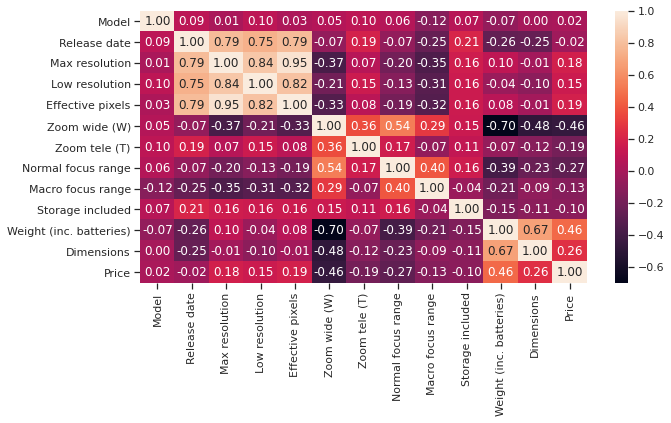

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

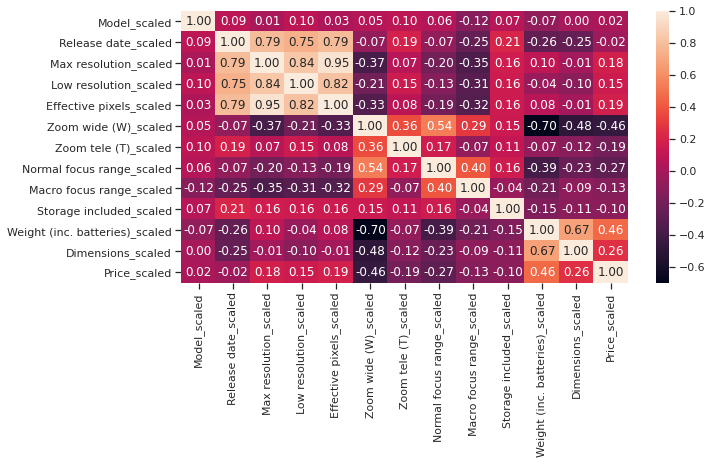

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают.
* Целевой признак Price наиболее коррелирует с признаком Weight (inc. batteries) (0.46). Этот признак обязательно следует оставить в модели регрессии.
* Также целевой признак Price имеет отрицательный коэффициент корреляции с признаком Zoom wide.(-0.46). Оставим этот признак в модели.
* С остальными признаками признак Price слабо коррелирован.
* Ряд признаков достаточно сильно коррелируют друг с другом:
1. Признак Release date достаточно сильно коррелирует с рядом признаков: Max resolution(0.79), Low resolution (0.75), Effective pixels(0.79). 
2. Признак Max resolution достаточно сильно коррелирует с рядом признаков: Release date (0.79), Low resolution (0.84), Effective pixels(0.95). 
3. Признак Low resolution достаточно сильно коррелирует с рядом признаков: Release date (0.75), Max resolution (0.84), Effective pixels(0.82). 
4. Признак Effective pixels достаточно сильно коррелирует с рядом признаков: Release date (0.79), Max resolution (0.95), Low resolution(0.82). 
5. Признак Weight отрицательно коррелировани с признаком Zoom wide(-0,7).
6. Признак Weight коррелировани с признаком Dimensions(0.67).

Из этих признаков можно оставить в модели следующие признаки: Max resolution, Effective pixels, Weight и Zoom wide так как они более, чем остальные коррелируют с целевым признаком.
* На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

5) Выбор метрик для последующей оценки качества моделей.

Возьмем метрики MAE, Median Absolute Error и  R².
* MAE (Mean Absolute Error) — это среднее модуля ошибки. Данная метрика удобна, она не чувствительна к выбросам,  как MSE, показывает среднюю ошибку
* Медиана абсолютного отклонения(Median Absolute Error) - это альтернатива стандартного отклонения, менее чувствительна к воздействию промахов
* Коэффициент детерминации показывает, насколько модель соответствует или не соответствует данным.

In [0]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

6) Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи регрессии будем использовать следующие модели:

* Возьмем модели случайный лес и дерево решений, поскольку они показали оптимальные результаты.
* В качестве ансамблевой модели возьмем 'TREE+RF=>LR' модель

7) Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [0]:
 # Перейдем к разделению выборки на обучающую и тестовую.
scaled_selected_columns = ['Max resolution_scaled', 'Effective pixels_scaled', 'Weight (inc. batteries)_scaled', 'Zoom wide (W)_scaled']
X = data [scaled_selected_columns]
y = data[['Price_scaled']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(934, 4)
(104, 4)
(934, 1)
(104, 1)


8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [0]:

regr_models = {'Tree':DecisionTreeRegressor(max_depth=8), 'RF':RandomForestRegressor(max_depth=10, n_estimators=30)}

In [0]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [0]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, Y_pred)
    medae = median_absolute_error(y_test, Y_pred)
    r2 = r2_score(y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MedAE', model_name, medae)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MedAE={}, R2={}'.format(
        round(mae, 3), round(medae, 3), round(r2, 3)))
    print('*****************************************************')

In [29]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=0.034, MedAE=0.017, R2=0.283
*****************************************************
*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [30]:
!pip install heamy

Ансамблевые модели

In [31]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
# набор данных
dataset = Dataset(X_train, y_train, X_test)
# Возьмем лучшую модель: 'TREE+RF=>LR'
# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'max_depth':5},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'max_depth':5},name='rf')

# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)


results = stacker.validate(k=10,scorer=median_absolute_error)

/usr/local/lib/python3.6/dist-packages/heamy/estimator.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)
/usr/local/lib/python3.6/dist-packages/heamy/estimator.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)
/usr/local/lib/python3.6/dist-packages/heamy/estimator.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)
/usr/local/lib/python3.6/dist-packages/heamy/estimator.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y

Metric: mean_absolute_error
Folds accuracy: [0.035015340350949685, 0.038473795684050176, 0.029663645503897926, 0.0448844736190887, 0.02909089371902839, 0.03368646560661676, 0.041538673044271335, 0.044527258839810284, 0.04073281016415769, 0.03776846743721074]
Mean accuracy: 0.03753818239690817
Standard Deviation: 0.005334028788522665
Variance: 2.8451863116788567e-05
Metric: median_absolute_error
Folds accuracy: [0.02316618921204894, 0.018891340509603255, 0.018110485263508464, 0.024161187556258103, 0.02287397119164028, 0.02037694309237663, 0.025863521387493614, 0.018434341093223706, 0.017336489949400204, 0.020481418650897837]
Mean accuracy: 0.020969588790645106
Standard Deviation: 0.0027440594138389497
Variance: 7.52986206667816e-06


9) Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [80]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
n_range = np.array(range(0,50,5))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [33]:
%%time
rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
rf_gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this tra

CPU times: user 11 s, sys: 66 ms, total: 11.1 s
Wall time: 11 s


In [34]:
# модель
rf_gs.best_estimator_
# Подобранные значение параметров
rf_gs.best_params_

{'max_depth': 45}

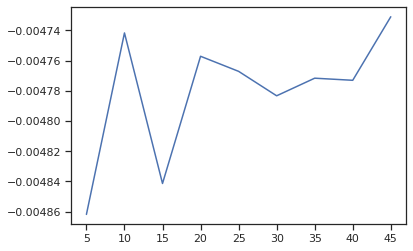

In [35]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, rf_gs.cv_results_['mean_test_score'])

For Tree

In [36]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [37]:
n_range = np.array(range(0,50,5))

tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [38]:
%%time
dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
dt_gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-t

CPU times: user 269 ms, sys: 1.42 ms, total: 270 ms
Wall time: 272 ms


In [39]:
# модель
dt_gs.best_estimator_
# Подобранные значение параметров
dt_gs.best_params_

{'max_depth': 10}

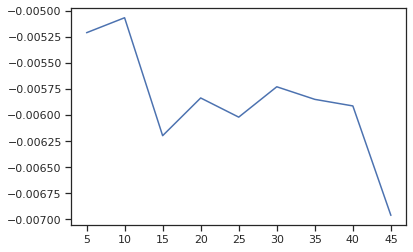

In [40]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, dt_gs.cv_results_['mean_test_score'])

Decision tree

In [41]:
n_range = [0, 0.5, 1, 1.5, 2, 2.5, 3]
tuned_parameters = [{'min_impurity_split': n_range}]
tuned_parameters

[{'min_impurity_split': [0, 0.5, 1, 1.5, 2, 2.5, 3]}]

In [42]:
%%time
ens_dt_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_dt_gs.fit(X_train, y_train)

CPU times: user 172 ms, sys: 6.19 ms, total: 178 ms
Wall time: 175 ms


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr

In [43]:
# модель
ens_dt_gs.best_estimator_
# Подобранные значение параметров
ens_dt_gs.best_params_

{'min_impurity_split': 0}

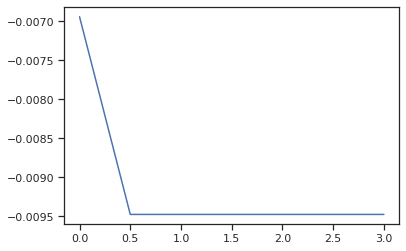

In [44]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, ens_dt_gs.cv_results_['mean_test_score'])

Random Forest

In [45]:
n_range = [1, 5, 10, 20, 30, 40 ,50 ,60]
tuned_parameters = [{'n_estimators': n_range}]
tuned_parameters

[{'n_estimators': [1, 5, 10, 20, 30, 40, 50, 60]}]

In [46]:
%%time
ens_rf_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
ens_rf_gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

CPU times: user 3.02 s, sys: 18.3 ms, total: 3.04 s
Wall time: 3.04 s


In [47]:
# модель
ens_rf_gs.best_estimator_
# Подобранные значение параметров
ens_rf_gs.best_params_

{'n_estimators': 60}

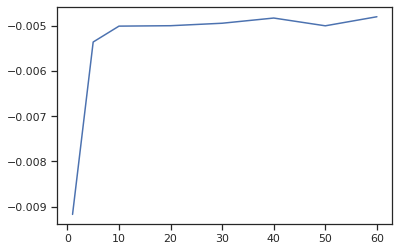

In [48]:
# Изменение качества на тестовой выборке 
plt.plot(n_range, ens_rf_gs.cv_results_['mean_test_score'])

10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [0]:
regr_models_grid = {'Tree':dt_gs.best_estimator_, 'RF': rf_gs.best_estimator_}

In [50]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

MAE=0.035, MedAE=0.012, R2=0.195
*****************************************************


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*****************************************************
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=45, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

MAE=0.03, MedAE=0.018, R2=0.547
*****************************************************


In [51]:
# Возьмем лучшую модель: 'TREE+RF=>LR'
model_tree = Regressor(dataset=dataset,
                       estimator=DecisionTreeRegressor,
                       parameters={'min_impurity_split':0.5,
                                  'max_depth':20},name='tree')
model_lr = Regressor(dataset=dataset,
                     estimator=LinearRegression,
                     name='lr')
model_rf = Regressor(dataset=dataset,
                     estimator=RandomForestRegressor,
                     parameters={'n_estimators': 60,
                                'max_depth': 40},name='rf')

pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is depr

In [52]:
results = stacker.validate(k=10,scorer=mean_absolute_error)

results = stacker.validate(k=10,scorer=median_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.03229648120948647, 0.04286288408566003, 0.02906306904132256, 0.039329985972510716, 0.026904067355335275, 0.03514838263200409, 0.046203687692425326, 0.042302785248270164, 0.04109620673049738, 0.040664649728357274]
Mean accuracy: 0.03758721996958693
Standard Deviation: 0.006081646505225842
Variance: 3.69864242145257e-05
Metric: median_absolute_error
Folds accuracy: [0.015954944789156423, 0.016093400247818176, 0.014504558421556298, 0.018772765204227986, 0.01529113941230955, 0.017613502913307252, 0.022701854983674143, 0.01675730164793613, 0.016301072459173695, 0.018528316664114454]
Mean accuracy: 0.01725188567432741
Standard Deviation: 0.0022212703420943307
Variance: 4.934041932667865e-06


11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [53]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MedAE', 'R2'], dtype=object)

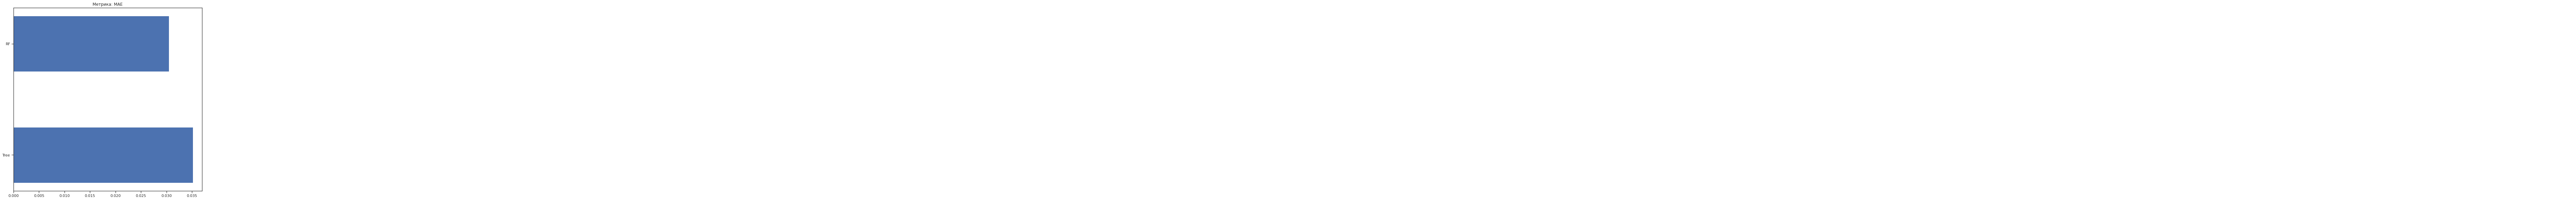

In [55]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', 
                      ascending=False, figsize=(10, 10))

In [59]:
regrMetricLogger.plot('Метрика: ' + 'MedAE', 'MedAE', 
                      ascending=False, figsize=(30, 30))

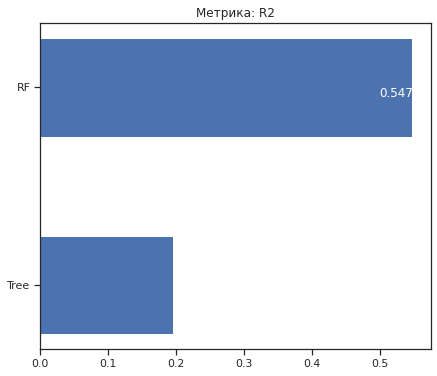

In [58]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2',
                      ascending=True, figsize=(7, 6))

Вывод: по трем метрикам (средняя абслоютная ошибка, медиана абсолютного отклонения и коэффициент детерминации) лучшими оказались модели на основе случайного леса(RF) и решающего дерева(Tree). 